In [170]:
# imports:
import numpy as np
import random
import numpy.linalg as lin
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



In [352]:
#eda and fixing nulls and such..
dsPath = 'D:\\cohen-proj\DS\penguins\penguins_size.csv'

data = pd.read_csv(dsPath)

print(data.head())

#data = np.array(data)
#n_samples , n_features = data.shape

#print("samp: ", n_samples)
#print ("feat: ",n_features)

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [353]:
# remove NaN's :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [354]:
#we can see some nulls so remove whole row = sample
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [355]:
# encode string vals to numbers  - "island " "speceis" "sex" using encoder
labelEncode=LabelEncoder()
data["island"] = labelEncode.fit_transform(data["island"])
data["sex"] = labelEncode.fit_transform(data["sex"])
data["species"] = labelEncode.fit_transform(data["species"])
data.head(20)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
6,0,2,38.9,17.8,181.0,3625.0,1
7,0,2,39.2,19.6,195.0,4675.0,2
12,0,2,41.1,17.6,182.0,3200.0,1
13,0,2,38.6,21.2,191.0,3800.0,2
14,0,2,34.6,21.1,198.0,4400.0,2


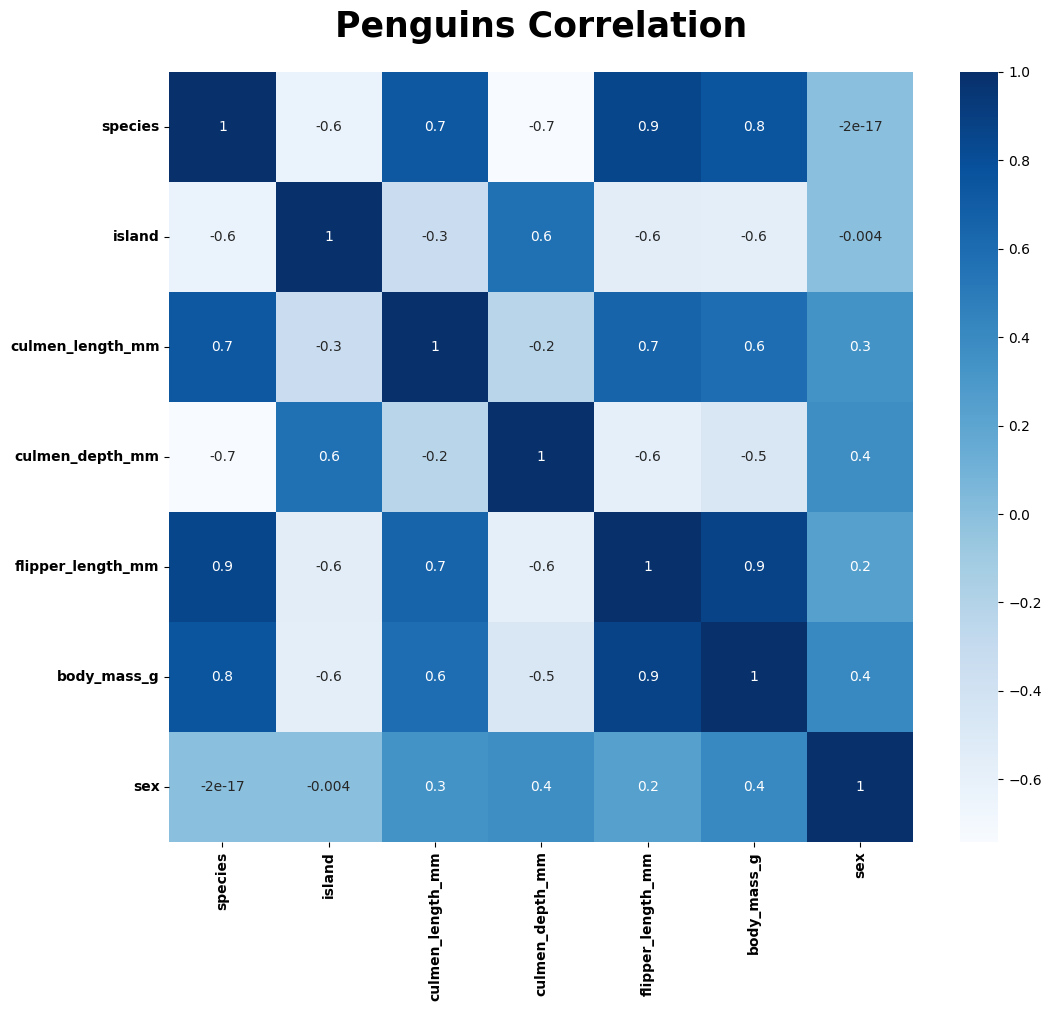

In [356]:
#lets check correlation to desired task (species classification)



plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), fmt=".1g", annot=True, cmap="Blues")
plt.title("Penguins Correlation", weight="bold", fontsize=25, pad=25)
plt.xticks(weight="semibold", fontsize=10)
plt.yticks(weight="semibold", fontsize=10);

In [357]:
data.corr()["species"].sort_values(ascending=False).to_frame()

,species
species,1.000000e+00
flipper_length_mm,8.513508e-01
body_mass_g,7.510201e-01
culmen_length_mm,7.292618e-01
sex,-1.625802e-17
island,-6.235949e-01
culmen_depth_mm,-7.408034e-01


In [358]:
##### notice !!!!! to run all test need to set not to drop sex+island columns

In [359]:
data1= data.drop(['sex','island'], axis=1)
#data1= data

In [375]:
#change to numpy array for manipulation 
arr = np.array(data1)
print(arr.shape)
y = arr [:,0]
diff_feats, count_feats = np.unique(y, return_counts=True)
print(count_feats)
#we can see unbalanced distribution -> under sample and add rest to VAL
under = min(count_feats)
under = under - 4
#leave some for val check

(334, 5)
[146  68 120]


In [361]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [320]:
diff_feats

array([0., 1., 2.])

In [316]:


#my train test split 
random.seed(10)

train = int(0.7*under)
test = under-train

# get train and test arrays
test_l = list()
train_l = list()
val_l = list()
arr_rows = arr.shape[0] - 1
y_pos = 0
np.random.seed(13)
for val in diff_feats:
    for j in range(int(test)):
        curr = np.random.randint(-1, high=arr_rows)
        while arr[curr][y_pos] != val:
            curr = np.random.randint(-1, high=arr_rows)

        test_l.append(arr[curr].copy())
        # print(arr[curr])
        arr[curr][y_pos] = 100
for val in diff_feats:
    for j in range(train):
        curr = np.random.randint(-1, high=arr_rows)
        while arr[curr][y_pos] != val:
            curr = np.random.randint(-1, high=arr_rows)

        train_l.append(arr[curr].copy())
        # print(arr[curr])
        arr[curr][y_pos] = 100
for i in range(arr.shape[0]):
    if arr[i][0]!=100:
        val_l.append(arr[i].copy())
        arr[i][y_pos] = 100
    # add randomize for idxes
random.shuffle(test_l)
random.shuffle(train_l)
random.shuffle(val_l)

test_arr = np.array(test_l)
train_arr = np.array(train_l)
val_arr = np.array(val_l)

# split features from target
X_train, y_train = train_arr[:, 1:].copy(), train_arr[:, 0].copy()
X_test, y_test = test_arr[:, 1:].copy(), test_arr[:, 0].copy()
X_val , y_val = val_arr[:, 1:].copy(), val_arr[:, 0].copy()


In [307]:
X_train[10]

array([1.00e+00, 5.58e+01, 1.98e+01, 2.07e+02, 4.00e+03, 2.00e+00])

In [362]:
### no under sample  test train split
random.seed(10)
test=0.7
row, col = arr.shape
train_row = int(test * row) # need fix to row both lines
test_row = row - train_row

#X = arr[:, :-1].copy()
diff_feats, count_feats = np.unique(y, return_counts=True)
uniquetest = int(test_row/len(count_feats))


#get train and test arrays
test_l=list()
train_l=list()
arr_rows=arr.shape[0]-1
y_pos = 0
np.random.seed(13)
for val in diff_feats:
    for j in range(uniquetest):
        curr = np.random.randint(-1, high=arr_rows)
        while arr[curr][y_pos] != val:
            curr = np.random.randint(-1, high=arr_rows)
        
        test_l.append(arr[curr].copy())
        #print(arr[curr])
        arr[curr][y_pos]=100
for i in range(len(arr)):
    if arr[i][y_pos] != 100:
        #print(arr[i])
        train_l.append(arr[i].copy())
        arr[i][y_pos] = 100
#add randomize for idxes
random.shuffle(test_l)
random.shuffle(train_l)

        
test_arr=np.array(test_l)
train_arr=np.array(train_l)


#split features from target
X1_train, y1_train = train_arr[:, 1:].copy(), train_arr[:, 0].copy()
X1_test, y1_test = test_arr[:, 1:].copy(), test_arr[:, 0].copy()

In [366]:
diff_feats, count_feats

(array([0., 1., 2.]), array([146,  68, 120], dtype=int64))

In [369]:
diff1_feats, count1_feats = np.unique(y1_test, return_counts=True)

In [370]:
diff1_feats, count1_feats

(array([0., 1., 2.]), array([33, 33, 33], dtype=int64))

In [322]:
X1_train[10]

array([0.000e+00, 4.330e+01, 1.400e+01, 2.080e+02, 4.575e+03, 1.000e+00])

In [323]:
y1_train[1:10]

array([0., 2., 0., 0., 2., 2., 2., 1., 0.])

In [378]:
y2= arr[:,0].copy()
XXX = arr[:,1:].copy()


from sklearn.model_selection import train_test_split
X2_train,X2_test, y2_train, y2_test =train_test_split( XXX, y2, test_size=0.30, shuffle=True)



In [379]:
X2_train.shape

(233, 4)

In [181]:
#helpers

### helpers
def eucDistance(p1,p2):
    arrp1 = np.array(p1)
    arrp2 = np.array(p2)
    return np.linalg.norm(arrp1 - arrp2)


def accTest(y_pred, y_true):
    correct = 0
    pred_len = len(y_pred)
    if pred_len == len(y_true):
        for i in range(pred_len):
            if y_pred[i] == y_true[i]:
                correct += 1
        return correct/pred_len
    else: print("prediction and true y not same len")
#methods - PCA , 
#models  - KNN , KMEANS , LIN SVM , PERCEPTRON

class mKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def pred(self, x):
        # for 1 row calc distances and return closest k
        distances = [eucDistance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]
        # most labels
        k_labels = [self.y_train[i] for i in k_idx]
        #print(k_labels)
        label, counts = np.unique(k_labels, return_counts=True)
        max_count = 0
        max_idx = 0
        for i in range(len(counts)):
            if counts[i] >= max_count:
                max_count = counts[i]
                max_idx = i
        return label[max_idx]

    def predict(self, X):
        predictions = [self.pred(x) for x in X]
        return predictions

class mPCA:
    def __init__(self, num_components):
        self.num_comp = num_components
        self.components = None
        self.mean=None
    def fit(self,X):
        #set mean for self
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        #calc covariance of transpose
        cov = np.cov(X.T)
        #eigen vectors and vals
        eiVals , eiVecs = np.linalg.eig(cov)
        eiVecs = eiVecs.T
        # sort from largest = most valubale for us
        idxs = np.argsort(eiVals)[::-1]
        eiVals = eiVals[idxs]
        eiVecs = eiVecs[idxs]

        # we keep the num_comp = vectors
        self.components = eiVecs[:self.num_comp]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


# np func to return 1/0 if x>0 as our threshold is 0
def step_func(x):
    return np.where(x > 0, 1, 0)



class mPERCEPTRON:
    def __init__(self,learning_rate = 0.01 , n_iterations = 1000):
        self.lr = learning_rate
        self.n_iter = n_iterations
        self.weights = None
        self.bias = None
        self.activation_func = step_func

    def fit (self , X, y):
        n_samp , n_feat = X.shape
        # need to init params well use random initiation
        # self.weights = np.random.rand(n_feat)
        self.weights = np.zeros(n_feat)
        # zero bias to begin with
        self.bias = 0

        # make y labels not negative
        y_1_0 = np.where(y>1, 1, 0)
        print(y_1_0)

        # learn weights:
        for i in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # weights.transpose*X + bias
                lin_output = np.dot(x_i, self.weights) + self.bias
                y_predict = self.activation_func(lin_output)

                # update rule:
                upd = self.lr *(y_1_0[idx] - y_predict)
                # weights
                self.weights += upd * x_i
                # bias
                self.bias += upd

    def predict(self, X):
        lin_output = np.dot(X, self.weights) + self.bias
        y_predict = self.activation_func(lin_output)
        ## need to add loss func and acc for each iter print
        return y_predict

# randomly assign k cluster centers , then label points to cluster with nearest centroid
# compute cluster mean ,set as center ,  and iterate untill distances minimized or no change


class mKMEANS:
    def __init__(self, k_clusters=3, max_iterations=100, plot_steps=False):
        self.k = k_clusters
        self.mean = None
        self.iter = max_iterations
        self.plot_steps = plot_steps
        # list of points for each cluster
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = None
        self.num_samples = None
        self.num_features = None
        self.X = None

    def predict(self, X):
        self.X = X
        self.num_samples, self.num_features = X.shape
        # randomly select k centroids
        rand_idxs = np.random.choice(self.num_samples, self.k, replace=False)
        self.centroids =np.array( [self.X[idx] for idx in rand_idxs])
        # assign points to cluster by distance to center
        # for each cent check distances to points take 1/k closest  and assign to cluster
        for _ in range(self.iter):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            if self._converged(centroids_old,self.centroids):

                # case no more changes
                break
            if self.plot_steps:
                self.plot()
        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            cent_idx = self._closest_cent(sample, centroids)
            clusters[cent_idx].append(idx)

        return clusters

    def _closest_cent(self, sample, centroids):
        distances = [eucDistance(sample, point) for point in centroids]

        closest_idx = np.argmin(distances)
        return closest_idx

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, idx in enumerate(self.clusters):
            point = self.X[idx].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()

    def _get_centroids(self, clusters):
        # get mean val and idx for each cluster , ret new centroids
        centroids = np.zeros((self.k, self.num_features))

        for clust_idx, cluster in enumerate(clusters):
            clust_mean = np.mean(self.X[cluster], axis=0)
            centroids[clust_idx] = clust_mean

        return centroids

    def _converged(self, centroids_old, centroids):

        # if distances == 0 we converged
        distances = [eucDistance(centroids[i],centroids_old[i]) for i in range(self.k)]


        if sum(distances) == 0:
            return True
        else:
            return False

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.num_samples)
        # for each cluster set all labels of points to cluster label
        for clust_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = clust_idx
        return labels









# make v1 then add kernels and see how it affects our prediction metrics
# late maybe do 1v1 or 1 v all mode

# steps : randomize weights , correct labels , apply update * iterations ,
class mSVM:
    def __init__(self, learn_rate = 0.001 , lambda_param= 0.01 , num_iters = 1000):
        self.lr = learn_rate
        self.lamb = lambda_param
        self.n_iter = num_iters
        #self.kern = kernel
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samp ,n_feat = X.shape
        # balance y to -1 1
        #_y = np.where(y<=0 , -1 ,1)
        _y = np.where(y == 0, -1, 1)
        # weights rand init
        self.w = np.zeros(n_feat)
        self.b = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                if (_y[idx]*(np.dot(self.w,x_i)-self.b))>=1:
                    self.w -= self.lr * (2*self.lamb*self.w)
                    #bias not updated cause grad is zero
                else:
                    self.w -= self.lr * (2*self.lamb - np.dot(_y[idx],x_i))
                    self.b -= self.lr * _y[idx]

    def predict(self, X):
        approximate = np.dot(X , self.w) - self.b
        return np.sign(approximate)





In [221]:
# KNN test
resmKNN = list()

for i in range(1,25):
    ls=list()
    ls.append(i)
    st=time.time()
    knn=mKNN(i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    en=time.time()
    ls.append(en-st)
    ls.append(accTest(pred , y_test))
    print("k is:", i)
    print("time taken :" ,en-st)
    print(accTest(pred , y_test))
    resmKNN.append(ls)

k is: 1
time taken : 0.03799271583557129
0.9833333333333333
k is: 2
time taken : 0.03600478172302246
0.9833333333333333
k is: 3
time taken : 0.03600788116455078
0.9833333333333333
k is: 4
time taken : 0.03600025177001953
0.9666666666666667
k is: 5
time taken : 0.03602886199951172
0.9666666666666667
k is: 6
time taken : 0.0360257625579834
0.9666666666666667
k is: 7
time taken : 0.03597259521484375
0.9833333333333333
k is: 8
time taken : 0.03699803352355957
0.9666666666666667
k is: 9
time taken : 0.03601336479187012
0.9666666666666667
k is: 10
time taken : 0.03600049018859863
0.9666666666666667
k is: 11
time taken : 0.03601551055908203
0.9666666666666667
k is: 12
time taken : 0.03706789016723633
0.9666666666666667
k is: 13
time taken : 0.037039756774902344
0.9666666666666667
k is: 14
time taken : 0.036989450454711914
0.9666666666666667
k is: 15
time taken : 0.03599953651428223
0.9666666666666667
k is: 16
time taken : 0.03699755668640137
0.9666666666666667
k is: 17
time taken : 0.03600001

In [456]:
# KNN test scaled
resmKNN1 = list()

for i in range(1,25):
    ls=list()
    ls.append(i)
    st=time.time()
    knn=mKNN(i)
    knn.fit(X3_train,y1_train)
    pred=knn.predict(X3_test)
    en=time.time()
    ls.append(en-st)
    ls.append(accTest(pred , y1_test))
    print("k is:", i)
    print("time taken :" ,en-st)
    print(accTest(pred , y1_test))
    resmKNN1.append(ls)

k is: 1
time taken : 0.1020040512084961
0.9696969696969697
k is: 2
time taken : 0.10300016403198242
0.9797979797979798
k is: 3
time taken : 0.10099959373474121
0.9696969696969697
k is: 4
time taken : 0.10199999809265137
0.9696969696969697
k is: 5
time taken : 0.10100030899047852
0.9494949494949495
k is: 6
time taken : 0.10100007057189941
0.9696969696969697
k is: 7
time taken : 0.1019890308380127
0.9595959595959596
k is: 8
time taken : 0.10101056098937988
0.9595959595959596
k is: 9
time taken : 0.09999990463256836
0.9494949494949495
k is: 10
time taken : 0.10299992561340332
0.9494949494949495
k is: 11
time taken : 0.10200071334838867
0.9494949494949495
k is: 12
time taken : 0.10099983215332031
0.9494949494949495
k is: 13
time taken : 0.10299968719482422
0.9191919191919192
k is: 14
time taken : 0.10100007057189941
0.9393939393939394
k is: 15
time taken : 0.10098910331726074
0.9292929292929293
k is: 16
time taken : 0.10201072692871094
0.9393939393939394
k is: 17
time taken : 0.10199999809

In [294]:
X_train.shape

(132, 6)

In [222]:
# KNN test from library


resKNN = list()
for i in range(1,25):
    ls=list()
    ls.append(i)
    st=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    en=time.time()
    ls.append(en-st)
    ls.append(accTest(pred , y_test))
    print("k is:", i)
    print("time taken :" ,en-st)
    print(accTest(pred , y_test))
    resKNN.append(ls)

k is: 1
time taken : 0.003000974655151367
0.9833333333333333
k is: 2
time taken : 0.0029976367950439453
0.9833333333333333
k is: 3
time taken : 0.00200653076171875
0.9833333333333333
k is: 4
time taken : 0.001995086669921875
0.9833333333333333
k is: 5
time taken : 0.0020012855529785156
0.9666666666666667
k is: 6
time taken : 0.0019979476928710938
0.9833333333333333
k is: 7
time taken : 0.002001047134399414
0.9833333333333333
k is: 8
time taken : 0.0020003318786621094
0.9833333333333333
k is: 9
time taken : 0.0019991397857666016
0.9666666666666667
k is: 10
time taken : 0.0020036697387695312
0.9666666666666667
k is: 11
time taken : 0.0020017623901367188
0.9666666666666667
k is: 12
time taken : 0.002997875213623047
0.9666666666666667
k is: 13
time taken : 0.0019969940185546875
0.9666666666666667
k is: 14
time taken : 0.002005338668823242
0.9666666666666667
k is: 15
time taken : 0.0020029544830322266
0.9666666666666667
k is: 16
time taken : 0.0019948482513427734
0.9833333333333333
k is: 17

In [457]:
# KNN test from library normalized


resKNN1 = list()
for i in range(1,25):
    ls=list()
    ls.append(i)
    st=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X3_train,y1_train)
    pred=knn.predict(X3_test)
    en=time.time()
    ls.append(en-st)
    ls.append(accTest(pred , y1_test))
    print("k is:", i)
    print("time taken :" ,en-st)
    print(accTest(pred , y1_test))
    resKNN1.append(ls)

k is: 1
time taken : 0.003998756408691406
0.9696969696969697
k is: 2
time taken : 0.0030024051666259766
0.9393939393939394
k is: 3
time taken : 0.003009796142578125
0.9696969696969697
k is: 4
time taken : 0.002986907958984375
0.9494949494949495
k is: 5
time taken : 0.0030024051666259766
0.9494949494949495
k is: 6
time taken : 0.002001047134399414
0.9393939393939394
k is: 7
time taken : 0.003010272979736328
0.9595959595959596
k is: 8
time taken : 0.0029997825622558594
0.9494949494949495
k is: 9
time taken : 0.0020008087158203125
0.9494949494949495
k is: 10
time taken : 0.002998828887939453
0.9292929292929293
k is: 11
time taken : 0.0029904842376708984
0.9494949494949495
k is: 12
time taken : 0.0020101070404052734
0.898989898989899
k is: 13
time taken : 0.0020003318786621094
0.9191919191919192
k is: 14
time taken : 0.002997159957885742
0.9191919191919192
k is: 15
time taken : 0.0029954910278320312
0.9292929292929293
k is: 16
time taken : 0.004007577896118164
0.9292929292929293
k is: 17
t

In [218]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predd=knn.predict(X_val)

print(accuracy_score(y_val, predd))
print(classification_report(y_val, predd))

0.9014084507042254
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        82
         1.0       0.22      1.00      0.36         4
         2.0       1.00      1.00      1.00        56

    accuracy                           0.90       142
   macro avg       0.74      0.94      0.76       142
weighted avg       0.98      0.90      0.93       142



In [220]:
knn = mKNN(3)
knn.fit(X_train,y_train)
predd=knn.predict(X_val)

print(accuracy_score(y_val, predd))
print(classification_report(y_val, predd))

0.9014084507042254
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        82
         1.0       0.22      1.00      0.36         4
         2.0       1.00      1.00      1.00        56

    accuracy                           0.90       142
   macro avg       0.74      0.94      0.76       142
weighted avg       0.98      0.90      0.93       142



In [235]:
print(resKNN[2][2])

0.9833333333333333


In [ ]:
## some plot code for results

In [458]:
# check if results are the same for my knn and library's knn :
my_loss =0
plxT1 = []
plyT1 = []
plxA1 = []
plyA1 = []
for i in range(len(resmKNN1)):
     
    plxT1.append(resmKNN1[i][1])
    plyT1.append(resKNN1[i][1])
    plxA1.append(resmKNN1[i][2])
    plyA1.append(resKNN1[i][2])
    if resmKNN1[i] == resKNN1 [i]:
        print( "SAME RESULTS FOR BOTH METHODS mKNN , KNN")
    else:
        print ("my res for k=",i+1 ," is :" , resmKNN1[i] )
        print (" res for k=",i+1 ," is :" , resKNN1[i] )
        print ("time diff =" ,resmKNN1[i][1]-resKNN1[i][1] )
        if resmKNN1[i][2]!=resKNN1[i][2]:
            my_loss = my_loss+1
print("my loss:",my_loss)        

my res for k= 1  is : [1, 0.1020040512084961, 0.9696969696969697]
 res for k= 1  is : [1, 0.003998756408691406, 0.9696969696969697]
time diff = 0.09800529479980469
my res for k= 2  is : [2, 0.10300016403198242, 0.9797979797979798]
 res for k= 2  is : [2, 0.0030024051666259766, 0.9393939393939394]
time diff = 0.09999775886535645
my res for k= 3  is : [3, 0.10099959373474121, 0.9696969696969697]
 res for k= 3  is : [3, 0.003009796142578125, 0.9696969696969697]
time diff = 0.09798979759216309
my res for k= 4  is : [4, 0.10199999809265137, 0.9696969696969697]
 res for k= 4  is : [4, 0.002986907958984375, 0.9494949494949495]
time diff = 0.09901309013366699
my res for k= 5  is : [5, 0.10100030899047852, 0.9494949494949495]
 res for k= 5  is : [5, 0.0030024051666259766, 0.9494949494949495]
time diff = 0.09799790382385254
my res for k= 6  is : [6, 0.10100007057189941, 0.9696969696969697]
 res for k= 6  is : [6, 0.002001047134399414, 0.9393939393939394]
time diff = 0.0989990234375
my res for k=

In [255]:
#plxT = []
#plyT = []
#plxA = []
#plyA = []
ti = [i for i in range(1,25)]    

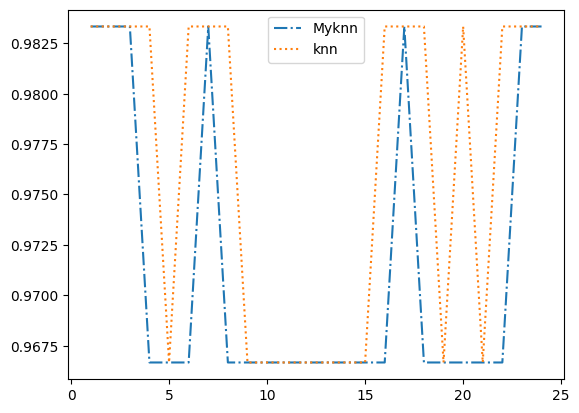

In [261]:


  
# plot lines 
#plt.plot(ti,plxT,  label = "MY knn", linestyle="-") 
#plt.plot(ti,plyT,  label = "knn", linestyle="--") 
plt.plot(ti,plxA,  label = "Myknn", linestyle="-.") 
plt.plot(ti,plyA,  label = "knn", linestyle=":") 
plt.legend() 
plt.show()

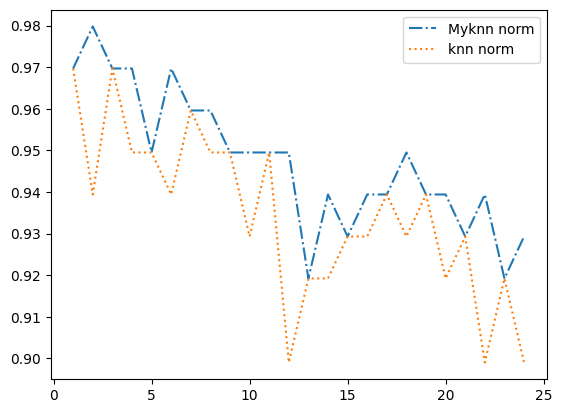

In [459]:
# plot lines 
#plt.plot(ti,plxT,  label = "MY knn", linestyle="-") 
#plt.plot(ti,plyT,  label = "knn", linestyle="--") 
plt.plot(ti,plxA1,  label = "Myknn norm", linestyle="-.") 
plt.plot(ti,plyA1,  label = "knn norm", linestyle=":") 
plt.legend() 
plt.show()

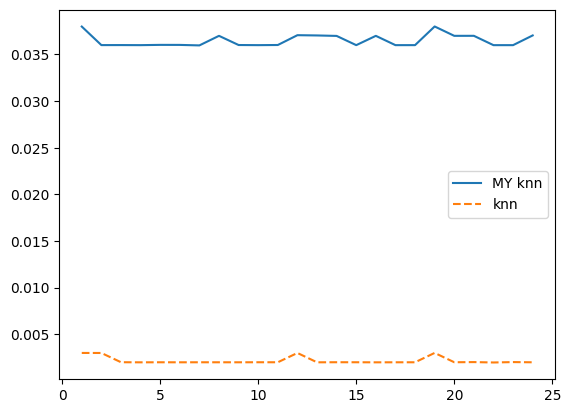

In [260]:


  
# plot lines 
plt.plot(ti,plxT,  label = "MY knn", linestyle="-") 
plt.plot(ti,plyT,  label = "knn", linestyle="--") 
#plt.plot(ti,plxA,  label = "curve 1", linestyle="-.") 
#plt.plot(ti,plyA,  label = "curve 2", linestyle=":") 
plt.legend() 
plt.show()

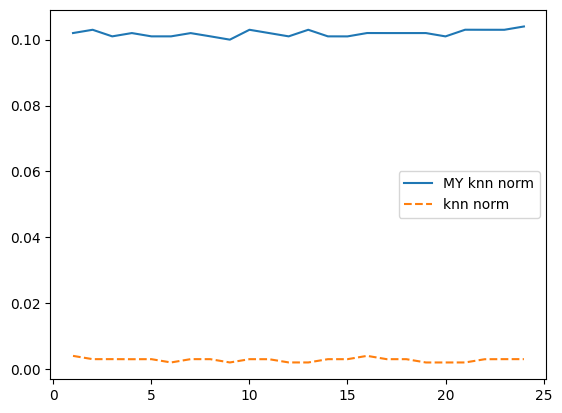

In [460]:


  
# plot lines 
plt.plot(ti,plxT1,  label = "MY knn norm", linestyle="-") 
plt.plot(ti,plyT1,  label = "knn norm", linestyle="--") 
#plt.plot(ti,plxA,  label = "curve 1", linestyle="-.") 
#plt.plot(ti,plyA,  label = "curve 2", linestyle=":") 
plt.legend() 
plt.show()

In [295]:
X_test.shape

(60, 6)

In [ ]:
# notice!!!! to run next test unmark line before data split to test train val

In [287]:
# KNN test (after deleting sex and island )
plACC = []

     
    
resKNN = list()
for i in range(1,25):
    ls=list()
    ls.append(i)
    st=time.time()
    knn=mKNN(i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    en=time.time()
    ls.append(en-st)
    ls.append(accTest(pred , y_test))
    print("k is:", i)
    print("time taken :" ,en-st)
    plACC.append(accTest(pred , y_test))
    print(accTest(pred , y_test))
    res.append(ls)

k is: 1
time taken : 0.03598642349243164
0.8333333333333334
k is: 2
time taken : 0.03599834442138672
0.75
k is: 3
time taken : 0.03499937057495117
0.7666666666666667
k is: 4
time taken : 0.03500080108642578
0.6833333333333333
k is: 5
time taken : 0.035997629165649414
0.7
k is: 6
time taken : 0.034999847412109375
0.7166666666666667
k is: 7
time taken : 0.03599977493286133
0.7
k is: 8
time taken : 0.03600120544433594
0.7
k is: 9
time taken : 0.036000728607177734
0.6166666666666667
k is: 10
time taken : 0.03600001335144043
0.7166666666666667
k is: 11
time taken : 0.03500032424926758
0.6666666666666666
k is: 12
time taken : 0.03599953651428223
0.7
k is: 13
time taken : 0.03500032424926758
0.6333333333333333
k is: 14
time taken : 0.03601861000061035
0.6833333333333333
k is: 15
time taken : 0.03699970245361328
0.6666666666666666
k is: 16
time taken : 0.03698158264160156
0.7166666666666667
k is: 17
time taken : 0.03600001335144043
0.6333333333333333
k is: 18
time taken : 0.03500032424926758
0

In [288]:
knn=mKNN(3)
knn.fit(X_train,y_train)
pred=knn.predict(X_val)
    
    
print(accTest(pred , y_val))


0.6901408450704225


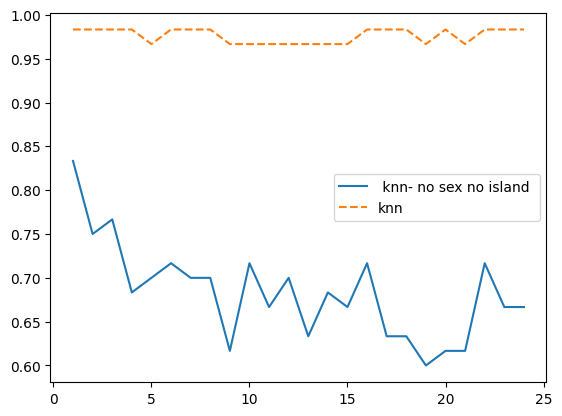

In [290]:
# plot lines 
plt.plot(ti,plACC,  label = " knn- no sex no island ", linestyle="-") 
plt.plot(ti,plyA,  label = "knn", linestyle="--") 
#plt.plot(ti,plxA,  label = "curve 1", linestyle="-.") 
#plt.plot(ti,plyA,  label = "curve 2", linestyle=":") 
plt.legend() 
plt.show()

In [ ]:
### KMEANS - for no sex no island- dataset - VERY BAD . 

In [345]:
kmean = mKMEANS(3)


In [346]:
predkm = kmean.predict(X1_test)
print(confusion_matrix(y1_test, predkm))

print(classification_report(y1_test, predkm))


[[ 1 17 15]
 [ 2 19 12]
 [29  4  0]]
              precision    recall  f1-score   support

         0.0       0.03      0.03      0.03        33
         1.0       0.47      0.58      0.52        33
         2.0       0.00      0.00      0.00        33

    accuracy                           0.20        99
   macro avg       0.17      0.20      0.18        99
weighted avg       0.17      0.20      0.18        99



In [350]:
print(confusion_matrix(y1_test, predkkm))

print(classification_report(y1_test, predkkm))

[[15 17  1]
 [12 19  2]
 [ 0  4 29]]
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50        33
         1.0       0.47      0.58      0.52        33
         2.0       0.91      0.88      0.89        33

    accuracy                           0.64        99
   macro avg       0.65      0.64      0.64        99
weighted avg       0.65      0.64      0.64        99



In [349]:
predkm2 =list()
for i in range(predkm.shape[0]):
    if predkm[i] == 2:
        predkm2.append(0)
    else:
        if predkm[i] == 0:
            predkm2.append(2) 
        else:
            predkm2.append(1)
predkkm = np.array(predkm2)

In [363]:
predkm3 = kmean.predict(X1_test)
print(confusion_matrix(y1_test, predkm3))

print(classification_report(y1_test, predkm3))


[[17 15  1]
 [19 12  2]
 [ 4  0 29]]
              precision    recall  f1-score   support

         0.0       0.42      0.52      0.47        33
         1.0       0.44      0.36      0.40        33
         2.0       0.91      0.88      0.89        33

    accuracy                           0.59        99
   macro avg       0.59      0.59      0.59        99
weighted avg       0.59      0.59      0.59        99



In [454]:
predkm4 = kmean.predict(X3_test)
print(confusion_matrix(y1_test, predkm4))

print(classification_report(y1_test, predkm4))


[[25  8  0]
 [ 5 28  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        33
         1.0       0.78      0.85      0.81        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.87        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.87      0.87      0.87        99



In [449]:
predkkkm =list()
for i in range(predkm4.shape[0]):
    if predkm4[i] == 2:
        predkkkm.append(1)
    else:
        if predkm4[i] == 3:
            predkkkm.append(1) 
        else:
            predkkkm.append(0)
predkkkm = np.array(predkm2)

In [447]:
print(confusion_matrix(y1_test, predkkkm))

print(classification_report(y1_test, predkkkm))

[[15 17  1]
 [12 19  2]
 [ 0  4 29]]
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50        33
         1.0       0.47      0.58      0.52        33
         2.0       0.91      0.88      0.89        33

    accuracy                           0.64        99
   macro avg       0.65      0.64      0.64        99
weighted avg       0.65      0.64      0.64        99



experimenting with different basic methods for classification :
## all test on different kinds of data splits (and some normalization) below 

In [ ]:
 # KFOLD cross validation on 2 kinds of data - 1. under sampled . 2. random split.

In [152]:
# 1. Xfold evaluation  - under sampled for uniform distribution
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('rfc', RandomForestClassifier()))
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=None)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

KNN:, 0.668132, (0.111071)
NB:, 0.954396, (0.050719)
SVM:, 0.508242, (0.053001)
rfc:, 0.984615, (0.030769)


In [380]:
# 3. Xfold evaluation  - tts
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('rfc', RandomForestClassifier()))
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=None)
    cv_results= cross_val_score(model, X2_train, y2_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

KNN:, 0.790217, (0.066250)
NB:, 0.974275, (0.028630)
SVM:, 0.734783, (0.102050)
rfc:, 0.965761, (0.025316)


In [413]:
# 2. Xfold evaluation  - random split data 
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('rfc', RandomForestClassifier()))
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=5, random_state=None)
    cv_results= cross_val_score(model, X1_train, y1_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.821277, (0.045831)
NB:, 0.974468, (0.020847)
SVM:, 0.765957, (0.038061)
rfc:, 0.970213, (0.017021)


In [441]:


rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
pred1 = model1.predict(X_test)
pred2 =model1.predict(X_val)

print(confusion_matrix(y_test, pred1))
print(confusion_matrix(y_val, pred2))
print(classification_report(y_test, pred1))
print(classification_report(y_val, pred2))


[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]
[[76  6  0]
 [ 0  4  0]
 [ 0  0 56]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        82
         1.0       0.40      1.00      0.57         4
         2.0       1.00      1.00      1.00        56

    accuracy                           0.96       142
   macro avg       0.80      0.98      0.84       142
weighted avg       0.98      0.96      0.97       142



In [156]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred3= rfc.predict(X_test)
print(accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))

0.9833333333333333
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.95      0.97        20
         2.0       1.00      1.00      1.00        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

[[20  0  0]
 [ 1 19  0]
 [ 0  0 20]]


In [381]:
rfc = RandomForestClassifier()
rfc.fit(X2_train, y2_train)
pred333= rfc.predict(X2_test)
print(accuracy_score(y2_test, pred333))
print(classification_report(y2_test, pred333))
print(confusion_matrix(y2_test, pred333))

0.9900990099009901
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        35
         1.0       0.96      1.00      0.98        26
         2.0       1.00      1.00      1.00        40

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

[[34  1  0]
 [ 0 26  0]
 [ 0  0 40]]


In [330]:
rfc = RandomForestClassifier()
rfc.fit(X1_train, y1_train)
pred33= rfc.predict(X1_test)
print(accuracy_score(y1_test, pred33))
print(classification_report(y1_test, pred33))
print(confusion_matrix(y1_test, pred33))

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        33
         2.0       1.00      1.00      1.00        33

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

[[33  0  0]
 [ 0 33  0]
 [ 0  0 33]]


In [157]:
NB = GaussianNB()
NB.fit(X_train, y_train)
pred4 = NB.predict(X_test)
print(accuracy_score(y_test, pred4))
print(classification_report(y_test, pred4))
print(confusion_matrix(y_test, pred4))


0.9833333333333333
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20
         2.0       1.00      1.00      1.00        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

[[19  1  0]
 [ 0 20  0]
 [ 0  0 20]]


In [329]:
NB = GaussianNB()
NB.fit(X1_train, y1_train)
pred44 = NB.predict(X1_test)
print(accuracy_score(y1_test, pred44))
print(classification_report(y1_test, pred44))
print(confusion_matrix(y1_test, pred44))


0.9696969696969697
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        33
         1.0       0.94      0.97      0.96        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

[[31  2  0]
 [ 1 32  0]
 [ 0  0 33]]


In [382]:
NB = GaussianNB()
NB.fit(X2_train, y2_train)
pred444 = NB.predict(X2_test)
print(accuracy_score(y2_test, pred444))
print(classification_report(y2_test, pred444))
print(confusion_matrix(y2_test, pred444))



0.9603960396039604
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        35
         1.0       0.92      0.92      0.92        26
         2.0       1.00      1.00      1.00        40

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101

[[33  2  0]
 [ 2 24  0]
 [ 0  0 40]]


In [434]:
NB = GaussianNB()
NB.fit(X3_train, y1_train)
pred4444 = NB.predict(X3_test)
print(accuracy_score(y1_test, pred4444))
print(classification_report(y1_test, pred4444))
print(confusion_matrix(y1_test, pred4444))



0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        33
         1.0       1.00      0.67      0.80        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.89        99
   macro avg       0.92      0.89      0.89        99
weighted avg       0.92      0.89      0.89        99

[[33  0  0]
 [11 22  0]
 [ 0  0 33]]


In [264]:
KNN = KNeighborsClassifier(2)
KNN.fit(X_train, y_train)
pred5 = KNN.predict(X_test)
print(accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))
print(confusion_matrix(y_test, pred5))

0.9833333333333333
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20
         2.0       1.00      1.00      1.00        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

[[19  1  0]
 [ 0 20  0]
 [ 0  0 20]]


In [440]:
KNN = KNeighborsClassifier(2)
KNN.fit(X1_train, y1_train)
pred15 = KNN.predict(X1_test)
print(accuracy_score(y1_test, pred15))
print(classification_report(y1_test, pred15))
print(confusion_matrix(y1_test, pred15))


0.696969696969697
              precision    recall  f1-score   support

         0.0       0.54      0.97      0.70        33
         1.0       1.00      0.15      0.26        33
         2.0       0.91      0.97      0.94        33

    accuracy                           0.70        99
   macro avg       0.82      0.70      0.63        99
weighted avg       0.82      0.70      0.63        99

[[32  0  1]
 [26  5  2]
 [ 1  0 32]]


In [415]:
KNN = KNeighborsClassifier(2)
KNN.fit(X3_train, y1_train)
pred155 = KNN.predict(X3_test)
print(accuracy_score(y1_test, pred155))
print(classification_report(y1_test, pred155))
print(confusion_matrix(y1_test, pred155))


0.9393939393939394
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        33
         1.0       1.00      0.82      0.90        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.94        99
   macro avg       0.95      0.94      0.94        99
weighted avg       0.95      0.94      0.94        99

[[33  0  0]
 [ 6 27  0]
 [ 0  0 33]]


In [438]:
KNN = KNeighborsClassifier(3)
KNN.fit(X3_train, y1_train)
pred1555 = KNN.predict(X3_test)
print(accuracy_score(y1_test, pred1555))
print(classification_report(y1_test, pred1555))
print(confusion_matrix(y1_test, pred1555))


0.9696969696969697
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        33
         1.0       1.00      0.91      0.95        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99

[[33  0  0]
 [ 3 30  0]
 [ 0  0 33]]


In [161]:
svm = SVC(C=0.5 ,kernel="poly")
svm.fit(X_train, y_train)
pred6 = svm.predict(X_test)
print(accuracy_score(y_test, pred6))
print(classification_report(y_test, pred6))
print(confusion_matrix(y_test, pred6))

0.6166666666666667
              precision    recall  f1-score   support

         0.0       0.46      0.30      0.36        20
         1.0       0.52      0.75      0.61        20
         2.0       0.89      0.80      0.84        20

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.61        60
weighted avg       0.62      0.62      0.61        60

[[ 6 14  0]
 [ 3 15  2]
 [ 4  0 16]]


In [418]:
svm = SVC(C=0.5 ,kernel="poly")
svm.fit(X3_train, y1_train)
pred66 = svm.predict(X3_test)
print(accuracy_score(y1_test, pred66))
print(classification_report(y1_test, pred66))
print(confusion_matrix(y1_test, pred66))

0.8080808080808081
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78        33
         1.0       1.00      0.42      0.60        33
         2.0       1.00      1.00      1.00        33

    accuracy                           0.81        99
   macro avg       0.88      0.81      0.79        99
weighted avg       0.88      0.81      0.79        99

[[33  0  0]
 [19 14  0]
 [ 0  0 33]]


In [400]:
X3_train = StandardScaler().fit_transform(X1_train)
X3_test = StandardScaler().fit_transform(X1_test)


In [409]:
clf3 = MLPClassifier(solver="lbfgs",
                alpha=0.01,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[3,3,3])
clf4 = MLPClassifier(alpha=0.22,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=10,solver = 'sgd')
clf3.fit(X3_train, y1_train)
clf4.fit(X3_train, y1_train)
pre1 = clf3.predict(X3_test)
pre2 = clf4.predict(X3_test)
print(accuracy_score( pre1,y1_test))
print(classification_report( pre1,y1_test))
print(confusion_matrix( pre1,y1_test))
print(accuracy_score( pre2,y1_test))
print(classification_report( pre2,y1_test))
print(confusion_matrix( pre2,y1_test))

0.9494949494949495
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        38
         1.0       0.85      1.00      0.92        28
         2.0       1.00      1.00      1.00        33

    accuracy                           0.95        99
   macro avg       0.95      0.96      0.95        99
weighted avg       0.96      0.95      0.95        99

[[33  5  0]
 [ 0 28  0]
 [ 0  0 33]]
0.20202020202020202
              precision    recall  f1-score   support

         0.0       0.36      0.32      0.34        37
         1.0       0.24      0.27      0.25        30
         2.0       0.00      0.00      0.00        32

    accuracy                           0.20        99
   macro avg       0.20      0.20      0.20        99
weighted avg       0.21      0.20      0.21        99

[[12 14 11]
 [ 0  8 22]
 [21 11  0]]


In [433]:
clf3 = MLPClassifier(solver="lbfgs",
                alpha=0.52,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=3)
clf4 = MLPClassifier(alpha=0.02,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=3,solver = 'sgd')
clf3.fit(X3_train, y1_train)
clf4.fit(X3_train, y1_train)
pre1 = clf3.predict(X3_test)
pre2 = clf4.predict(X3_test)
print(accuracy_score( pre1,y1_test))
print(classification_report( pre1,y1_test))
print(confusion_matrix( pre1,y1_test))
print(accuracy_score( pre2,y1_test))
print(classification_report( pre2,y1_test))
print(confusion_matrix( pre2,y1_test))

0.9494949494949495
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        38
         1.0       0.85      1.00      0.92        28
         2.0       1.00      1.00      1.00        33

    accuracy                           0.95        99
   macro avg       0.95      0.96      0.95        99
weighted avg       0.96      0.95      0.95        99

[[33  5  0]
 [ 0 28  0]
 [ 0  0 33]]
0.7676767676767676
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77        53
         1.0       0.30      1.00      0.47        10
         2.0       1.00      0.92      0.96        36

    accuracy                           0.77        99
   macro avg       0.77      0.85      0.73        99
weighted avg       0.93      0.77      0.81        99

[[33 20  0]
 [ 0 10  0]
 [ 0  3 33]]
